# Titanic Project
####  Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading and reading dataset

In [2]:
titanic = pd.read_csv("titanic.txt")
# Reading first 6 rows
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### Attributes Information :

1. survival - Survival (0 = No; 1 = Yes)
2. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Sex
5. age - Age
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# let's check the dimension/shape/structure of our dataset.
print("Rows : Columns "+str(titanic.shape))

Rows : Columns (891, 12)


In [4]:
# Checking columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking full information of our dataset.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Titanic dataset contains `Rows-891`, `Columns-12` and some columns contains null values.

Data type :
* Integer - 5
* Object - 5
* Float - 2

In [6]:
# Let's check the null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2 of our columns contains many null values but 1 column contains only 2 null values.

In [7]:
# Checking missing percentage 
print("Missing percentage of Age column:"+str(round(titanic['Age'].isnull().sum()/len(titanic)*100,0)) +"%")
print("Missing percentage of Cabin column:"+str(round(titanic['Cabin'].isnull().sum()/len(titanic)*100,0)) +"%")


Missing percentage of Age column:20.0%
Missing percentage of Cabin column:77.0%


Both of columns contains a high value of missing values which gonna affect our model accuracy. Column Age can be treated but column Cabin after treating missing values may hinder our prediction.We will decide later whether to remove it or do some changes in it.

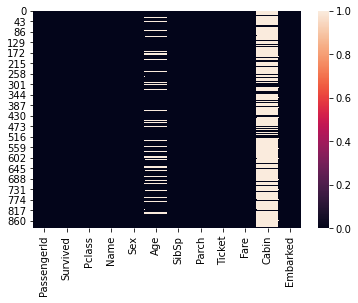

In [8]:
# Checking null values using graph
sns.heatmap(titanic.isnull())

 20 percent of the Age data is missing .The proportion of Age missing is likely small enough for resonable replacement with some form of imputation.Looking at the cabin column,it looks like we are just missing too much of that data to do something useful with at a basic level.We'll probably drop this column later,or change it to another feature like "Cabin known:1 or 0"

In [9]:
# Now checking  features description.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seeing  features description ,we can see that there is presence of outliers in some of the columns.As there is difference between mean and median.Also in some columns,100th percentile is far greater than 75th percentile.

### Exploratory Data Analysis

In [10]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


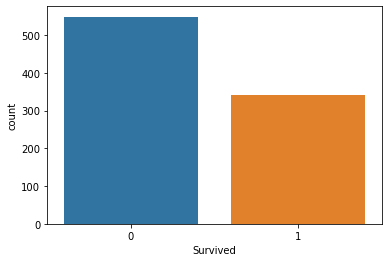

0    549
1    342
Name: Survived, dtype: int64


In [11]:
sns.countplot(titanic['Survived'])
plt.show()
print(titanic['Survived'].value_counts())

We have a dataset of titanic in which `549` people survived and `342` were not survived due to the sinking of the ship.

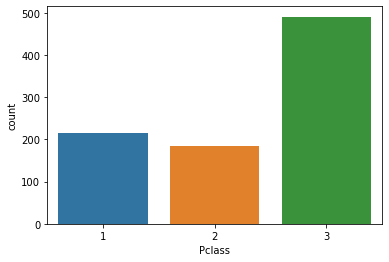

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [12]:
# Cheking the types of Passenger's class
sns.countplot(titanic['Pclass'])
plt.show()
print(titanic['Pclass'].value_counts())

There were 3 types of passenger's class in the ship -
* 1 -> 1st class in which 216 passengers were present.
* 2 -> 2nd class in which 184 passengers were present.
* 3 -> 3rd class in which 491 passengers were present.

male      577
female    314
Name: Sex, dtype: int64


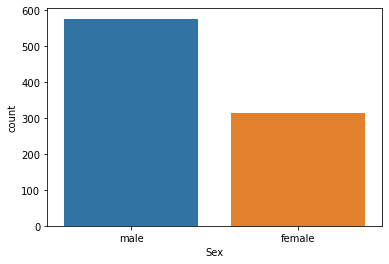

In [13]:
sns.countplot(titanic['Sex'])
print(titanic['Sex'].value_counts())

There were total `577 males` and `314 females`.

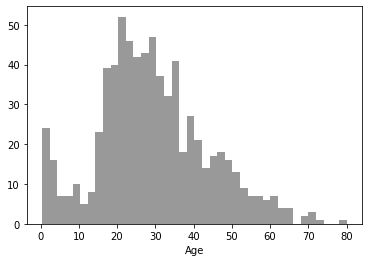

In [14]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='black',bins=40)

The `Age` column shows that range of people's age on the ship was 0-80 and maximum was in 20-40 range.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


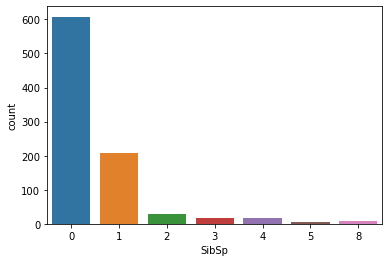

In [15]:
sns.countplot(titanic['SibSp'])
print(titanic['SibSp'].value_counts())

`sibsp` shows the siblings/spouse.Out of 891 passengers ,608 were with no siblings/spouses and 209 were with 1 sibling/spouse.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


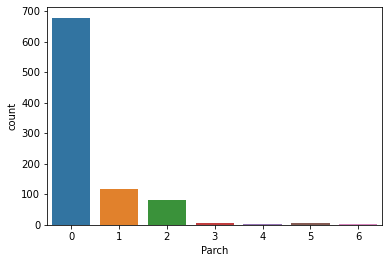

In [16]:
sns.countplot(titanic['Parch'])
print(titanic['Parch'].value_counts())

`Parch` show the parents/children aboard.The data of this column somwhow show some realtoinship with the `Sibsp` column.

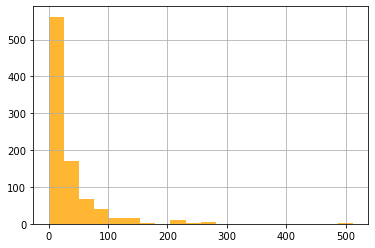

In [17]:
titanic['Fare'].hist(color='orange',bins=20,alpha=0.8)

Here we can see that most of the fare is between 0-100 and there may be some outliers presence.

32.2042079685746
14.4542


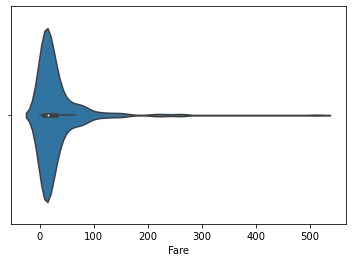

In [18]:
sns.violinplot(x='Fare',data=titanic)
print(titanic['Fare'].mean())
print(titanic['Fare'].median())

In `Fare` column ,range near 0-500.But the concentration is high between 0-50. As there is huge variance in the mean and median of fare ,this must be due to presence of outliers in the column

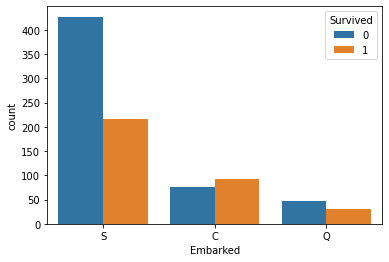

In [19]:
sns.countplot(x='Embarked',hue='Survived',data=titanic)

`Embarked` refers to the ports.Maximum was on the port `S = Southampton`.

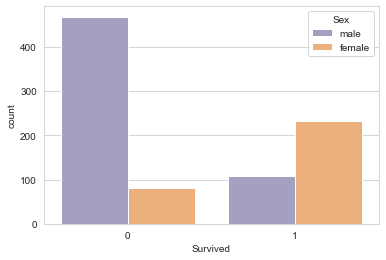

In [20]:
# Let's move towards bivariate analysis.
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='tab20c_r')

Here we can see that more focus of help was to the females/children.

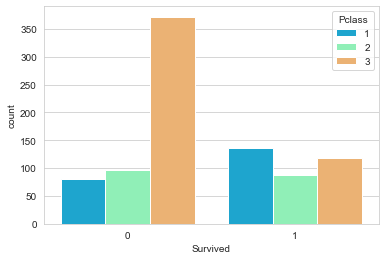

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

We can see that rate of evacuation high class members was greater than any other class.As high class members paid high fare for the travel.

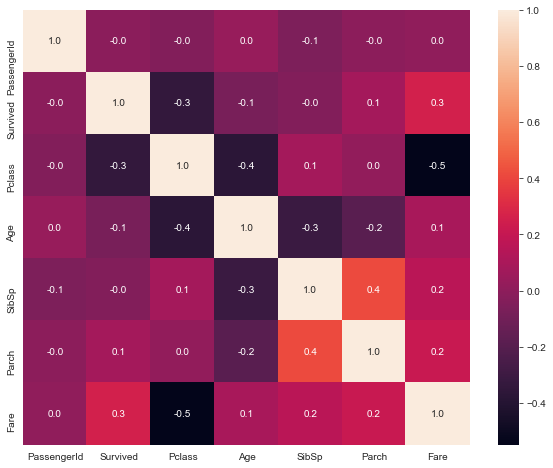

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True,fmt='.1f')

Using the correaltion graph we can say that there is no high correlation between the dependent variable and independent variables.Fare and Pclass varaiable shows some strength in correaltion as we discussed above that evacuation from ship was based a liitle bit on  Fare and class of memebers.

### Data Cleaning


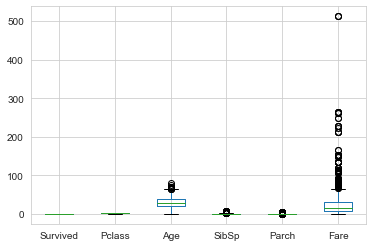

In [23]:
titanic.iloc[:,1:].plot(kind='box')

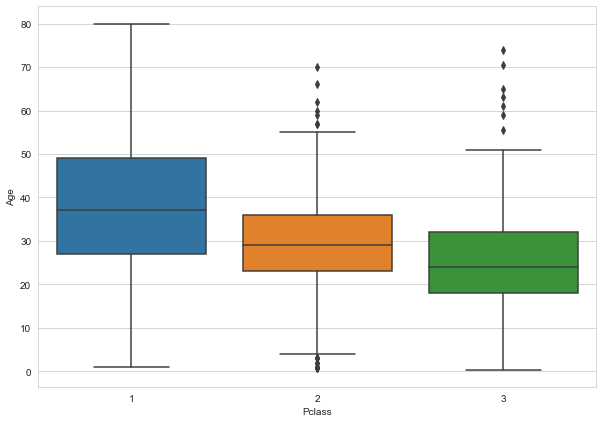

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Age',x='Pclass',data=titanic)

we can see the wealthier passengers in the higher classes tends to be older,which makes sense.We'll use  these average age to impute bsed on Pclass for Age.

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return(Age)

In [26]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check the heatmap again

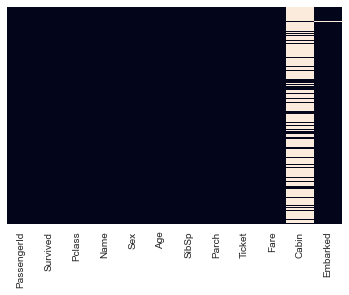

In [27]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

Now let's move ahead and remove column cabin as it conatins too much nan values.

In [28]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
# Replacing the missing values of embarked column with the mode.
titanic['Embarked'].mode()

0    S
dtype: object

In [31]:
titanic['Embarked']=titanic['Embarked'].fillna("S")

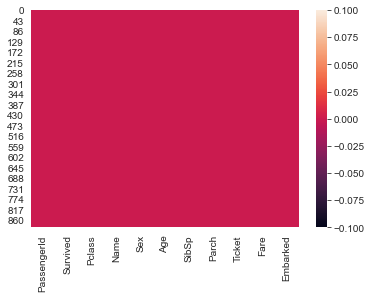

In [32]:
# Let's now check the heatmap
sns.heatmap(titanic.isnull())

We have successfully removed the null values from both the columns.

In [33]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting categorical variables

In [34]:
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()
titanic['sex']=encod.fit_transform(titanic['Sex'])
titanic['embarked']=encod.fit_transform(titanic['Embarked'])

In [35]:
titanic.drop(['Embarked','Sex','Ticket','Name'],axis=1,inplace=True)

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


### Separating independent and dependent variables

In [37]:
x=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [38]:
print("Independent variable shape :",x.shape)
print("Dependent variable shape :",y.shape)

Independent variable shape : (891, 8)
Dependent variable shape : (891,)


In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

### Train-Test spliting

In [40]:
max_acc=0
max_r=0


for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    prediction=lg.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    if accuracy>max_acc:
        max_acc=accuracy
        max_r=i
        
print("Maximum accuracy is attained ",max_acc,"at a random state of ",max_r)

Maximum accuracy is attained  0.8834080717488789 at a random state of  150


In [41]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
LG=LogisticRegression()
KNN=KNeighborsClassifier()
SVM=SVC()
DTC=DecisionTreeClassifier()
GNB=GaussianNB()

models=[LogisticRegression() ,KNeighborsClassifier() ,SVC() ,DecisionTreeClassifier(),GaussianNB()]
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=150)
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,m.predict(x_test)))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8834080717488789
[[124  10]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       134
           1       0.88      0.82      0.85        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.88       223
weighted avg       0.88      0.88      0.88       223



Accuracy score of KNeighborsClassifier() is:
0.852017937219731
[[124  10]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       134
           1       0.87      0.74      0.80        89

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



Accuracy score of SVC() is:
0.874439461883408
[[128   6]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    

`From above observations we find that LogisticRegression and SVC are giving better results.But as our case is for survived or not in which both precision and recall accuracy is important.So we have more concern toward LogisticRegression for our model than SVC, because classification report of LogisticRegression gives better results.`

`Let's check cross validation score to prevent from overfitting or underfitting of our model.`

In [43]:
# Checking he best cross-fold value

mean_score=0
for i in range(2,10):
    score=cross_val_score(LG,x,y,cv=i)
    if score.mean()>mean_score:
        mean_score=score.mean()

print(i)    
print(score.mean())
print(score.std())

9
0.7957351290684623
0.03003162325535276


In [44]:
# Testing options and evaluation metrics
num_folds=9

In [45]:
# Spot check algorithims
models=[]
models.append(("LG",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVC",SVC()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("GNB",GaussianNB()))

results = []
names = []

for name,model in models:
    kfold=KFold(n_splits=num_folds, random_state=150)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    accuracy = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(accuracy)                     

LG: 0.770911 (0.050748)
KNN: 0.773914 (0.037094)
SVC: 0.772432 (0.047385)
DTC: 0.721421 (0.046897)
GNB: 0.766507 (0.040995)


`Here we can see that SVC is giving better results than LogisticRegression .Due to over-fitting there is almost 9-10% change in the accuracy of model.But agian considering our main focus of metrics type we are considering the result of Logistic Regression is better than SVC.`

### Hyperparameter tunning using RandomizedSearchCV

In [46]:
from scipy.stats import uniform

In [47]:
# Create logistic regression
logistic = LogisticRegression()

In [48]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=9, verbose=0, n_jobs=-1)

In [51]:
# Fit randomized search
best_model = clf.fit(x_train, y_train)

In [52]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.28032598413051657


In [53]:
# Predict target vector
best_model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [54]:
model = LogisticRegression(penalty =  'l2',C= 0.28032598413051657)

In [55]:
model.fit(x_train,y_train)

LogisticRegression(C=0.28032598413051657)

In [56]:
pred=model.predict(x_test)

In [57]:
model.score(x_test,y_test)

0.8789237668161435

In [58]:
accuracy_score(y_test,pred)

0.8789237668161435

In [59]:
print(confusion_matrix(y_test,pred))

[[123  11]
 [ 16  73]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



In [61]:
score=cross_val_score(model, x, y, cv=9)
print(score.mean())
print(score.std())

0.7968574635241301
0.031021941551257586


In [62]:
from sklearn.metrics import roc_curve,auc

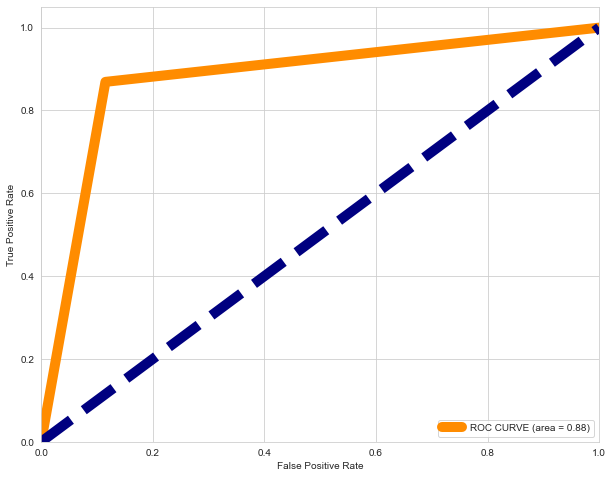

In [63]:
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving the file

In [64]:
import joblib
filename="logisticregression.obj"
joblib.dump(model,filename)

['logisticregression.obj']

## Conclusion

In [65]:
a=np.array(y_test)
b=np.array(model.predict(x_test))

In [66]:
titanic=pd.DataFrame({"Original":a,"Predicted":b})

In [67]:
titanic

,Original,Predicted
0,0,0
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
218,1,1
219,0,0
220,0,0
221,0,0
